# **Data Scientist Assignment Answer - Lim Kervan**

In [1]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250616 entries, 0 to 250615
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    250616 non-null  object 
 1   continent                                   236539 non-null  object 
 2   location                                    250616 non-null  object 
 3   date                                        250616 non-null  object 
 4   total_cases                                 236325 non-null  float64
 5   new_cases                                   235991 non-null  float64
 6   new_cases_smoothed                          234787 non-null  float64
 7   total_deaths                                216788 non-null  float64
 8   new_deaths                                  216683 non-null  float64
 9   new_deaths_smoothed                         215497 non-null  float64
 

In [3]:
df['date'] = pd.to_datetime(df['date'],format='%Y/%m/%d')

In [4]:
df_clean = df.dropna(subset=['total_deaths', 'total_cases','location','date','median_age']).copy()

Make prediction using age, date, location, buat probabilitynya dulsss

In [5]:
df_clean['Death_Probability'] = df_clean['total_deaths']/df_clean['total_cases']

Variable used: ['Location','Month','Year','median_age','Death_Probability']

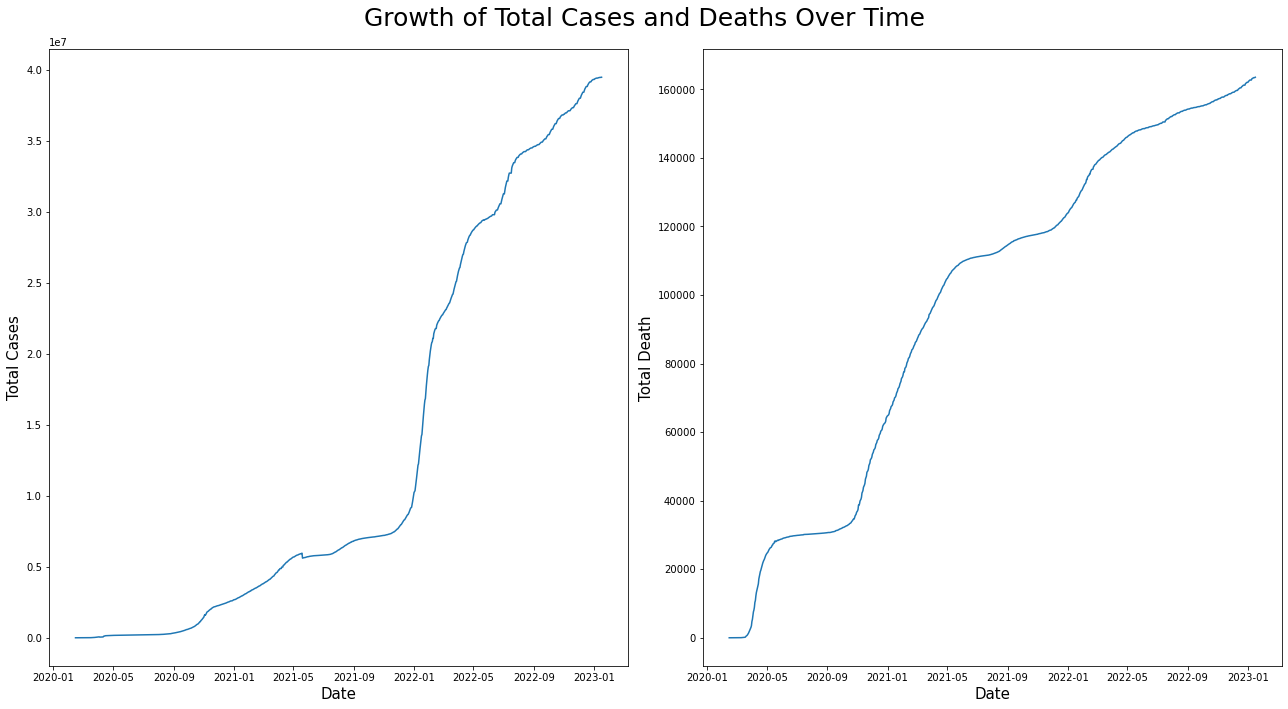

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(18,10))
sns.lineplot(ax=ax[0],x=df_clean[df_clean['location']=='France']['date'], y=df_clean[df_clean['location']=='France']['total_cases'])
sns.lineplot(ax=ax[1],x=df_clean[df_clean['location']=='France']['date'], y=df_clean[df_clean['location']=='France']['total_deaths'])
fig.suptitle('Growth of Total Cases and Deaths Over Time', size=25)
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Total Cases', size=15)
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Total Death', size=15)
plt.tight_layout()

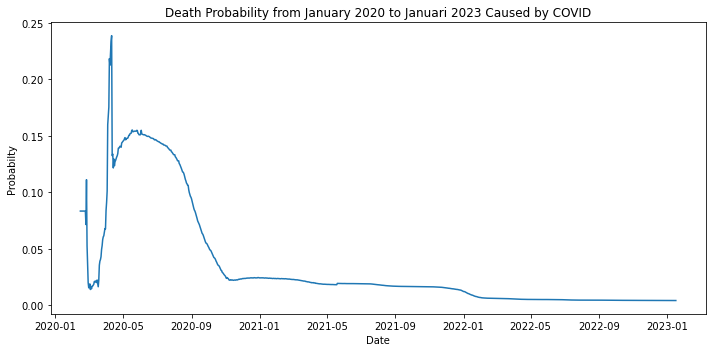

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df_clean[df_clean['location']=='France']['date'], y=df_clean[df_clean['location']=='France']['Death_Probability'])
plt.title('Death Probability from January 2020 to Januari 2023 Caused by COVID')
plt.xlabel('Date')
plt.ylabel('Probabilty')
plt.tight_layout()

In [8]:
df_clean_Used = df_clean[(df_clean['location']=='France')|((df_clean['median_age']>=24) & (df_clean['median_age']<=26))].reset_index(drop=True)
df_clean_Used = df_clean_Used[['location','date','median_age','Death_Probability']]
df_clean_Used.head()

,location,date,median_age,Death_Probability
0,Belize,2020-04-06,25.0,0.142857
1,Belize,2020-04-07,25.0,0.142857
2,Belize,2020-04-08,25.0,0.125000
3,Belize,2020-04-09,25.0,0.111111
4,Belize,2020-04-10,25.0,0.200000


In [9]:
df_clean_Used['location_label'] = df_clean_Used['location'].astype('category').cat.codes
df_clean_Used['Month'] = df_clean_Used['date'].dt.month
df_clean_Used['Year'] = df_clean_Used['date'].dt.year
df_clean_Used.head()

,location,date,median_age,Death_Probability,location_label,Month,Year
0,Belize,2020-04-06,25.0,0.142857,0,4,2020
1,Belize,2020-04-07,25.0,0.142857,0,4,2020
2,Belize,2020-04-08,25.0,0.125000,0,4,2020
3,Belize,2020-04-09,25.0,0.111111,0,4,2020
4,Belize,2020-04-10,25.0,0.200000,0,4,2020


### **Q1**

In [10]:
from sklearn.model_selection import train_test_split
X = df_clean_Used[['location_label','Month','Year','median_age']]
y = df_clean_Used['Death_Probability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1818)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE: ',mean_absolute_error(y_test, y_pred))
print('RMSE: ',mean_squared_error(y_test, y_pred,squared=False))
print('R2: ',r2_score(y_test, y_pred))

MAE:  0.015283028640749563
RMSE:  0.023766558600893346
R2:  0.1157431944456897


Not a really good model.

In [13]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)

y_pred_KNN = KNN.predict(X_test)

print('MAE: ',mean_absolute_error(y_test, y_pred_KNN))
print('RMSE: ',mean_squared_error(y_test, y_pred_KNN,squared=False))
print('R2: ',r2_score(y_test, y_pred_KNN))

MAE:  0.0015094395199608376
RMSE:  0.007385138521476213
R2:  0.9146186334441773


Let's try decision tree.

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

y_pred_tree = tree.predict(X_test)

In [15]:
print('MAE: ',mean_absolute_error(y_test, y_pred_tree))
print('RMSE: ',mean_squared_error(y_test, y_pred_tree,squared=False))
print('R2: ',r2_score(y_test, y_pred_tree))

MAE:  0.0014366940742715484
RMSE:  0.006812456086225797
R2:  0.9273470518987724


In [16]:
check = { 
    'location_label' : ['7'], 
    'Month' : [3], 
    'Year' : [2023], 
    'median_age' : [25]
} 

X_Check = pd.DataFrame(check)
X_Check

,location_label,Month,Year,median_age
0,7,3,2023,25


In [17]:
y_pred_Q1_LR = model.predict(X_Check)
y_pred_Q1_KNN = KNN.predict(X_Check)
y_pred_Q1_tree = tree.predict(X_Check)
print('Linear Regression prediction: ', y_pred_Q1_LR)
print('KNN prediction: ', y_pred_Q1_KNN)
print('Decision Tree prediction: ', y_pred_Q1_tree)

Linear Regression prediction:  [0.00711883]
KNN prediction:  [0.04911916]
Decision Tree prediction:  [0.04895466]


Since Decision Tree model a little bit better than KNN, so we will use Decision Tree Prediction to see the result of Q1, **0.04895466**

### **Q2**

US

In [18]:
print('Age Column for United States: ',df_clean[df_clean['location']=='United States']['median_age'].unique())
print('Age Column for China: ',df_clean[df_clean['location']=='China']['median_age'].unique())
print('Age Column for France: ',df_clean[df_clean['location']=='France']['median_age'].unique())
print('Age Column for Germany: ',df_clean[df_clean['location']=='Germany']['median_age'].unique())

Age Column for United States:  [38.3]
Age Column for China:  [38.7]
Age Column for France:  [42.]
Age Column for Germany:  [46.6]


I can't see for the correlation between age and number of deaths because the value of age is only one unique value.</br>
If I try to print the correlation number, what will come out is NaN

In [19]:
df_clean[df_clean['location']=='United States'][['median_age','total_deaths']].corr()

,median_age,total_deaths
median_age,NaN,NaN
total_deaths,NaN,1.0
